In [1]:
%env OMPL_PATH= /home/seiji/Research/ompl/py-bindings
from nonasymptotic.envs import StraightLine
from nonasymptotic.prm import SimplePRM

import matplotlib.pyplot as plt
import numpy as np

env: OMPL_PATH=/home/seiji/Research/ompl/py-bindings


Thu Jan  4 14:21:50 2024 Building RP forest with 15 trees
Thu Jan  4 14:21:53 2024 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	Stopping threshold met -- exiting after 2 iterations
Thu Jan  4 14:22:05 2024 Worst tree score: 0.99910000
Thu Jan  4 14:22:05 2024 Mean tree score: 0.99954667
Thu Jan  4 14:22:05 2024 Best tree score: 1.00000000
Thu Jan  4 14:22:07 2024 Forward diversification reduced edges from 300000 to 42331
Thu Jan  4 14:22:10 2024 Reverse diversification reduced edges from 42331 to 42331
Thu Jan  4 14:22:12 2024 Degree pruning reduced edges from 37902 to 37902
Thu Jan  4 14:22:12 2024 Resorting data and graph based on tree order
Thu Jan  4 14:22:12 2024 Building and compiling search function


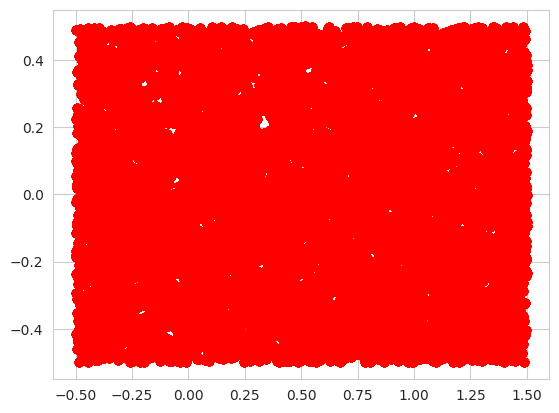

N Components: 1
N nodes: 10000
N edges: 61747


In [2]:
prm_env_2d = StraightLine(dim=2, delta_clearance=0.5)
prm = SimplePRM(0.2, prm_env_2d.is_motion_valid, prm_env_2d.sample_from_env)
prm.grow_to_n_samples(10000)

plt.figure()
for u, v in prm.g_prm.iterEdges():
    coords_u = prm.samples[u]
    coords_v = prm.samples[v]

    plt.plot([coords_u[0], coords_v[0]], [coords_u[1], coords_v[1]], 'ro-')

plt.show()

# some other computations to help other visual tests later on:
print('N Components: %i' % len(prm.g_cc.getComponents()))
print('N nodes: %i' % prm.num_vertices())
print('N edges: %i' % prm.num_edges())


N nodes: 10000
N edges: 61747


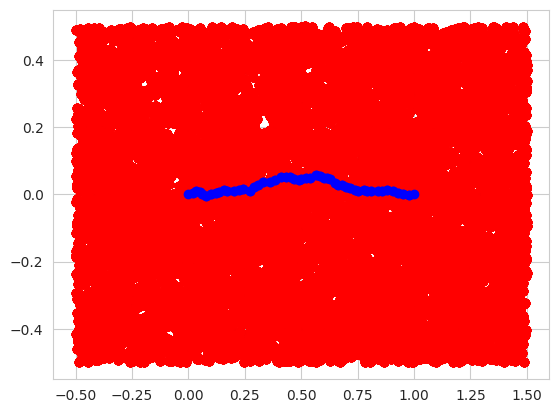

In [3]:
# do some connection queries with some existing points
s = np.array([0., 0.])
g = np.array([1., 0.])

sol_dist, sol_path = prm.query_best_solution(s, g)
sol_path = np.concatenate([[s], sol_path, [g]])

plt.figure()

# plot the existing prm
for u, v in prm.g_prm.iterEdges():
    coords_u = prm.samples[u]
    coords_v = prm.samples[v]

    plt.plot([coords_u[0], coords_v[0]], [coords_u[1], coords_v[1]], 'ro-')

for i in range(sol_path.shape[0] - 1):
    u = sol_path[i]
    v = sol_path[i+1]
    plt.plot([u[0], v[0]], [u[1], v[1]], 'bo-')

plt.plot()
print('N nodes: %i' % prm.num_vertices())
print('N edges: %i' % prm.num_edges())


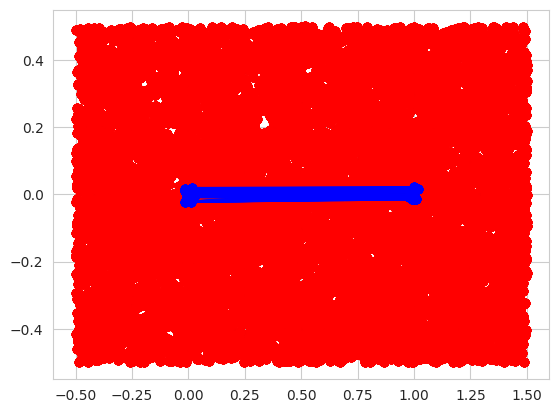

In [4]:
pairs, _ = prm.query_all_graph_connections(s, g)
plt.figure()

# plot the existing prm
for u, v in prm.g_prm.iterEdges():
    coords_u = prm.samples[u]
    coords_v = prm.samples[v]

    plt.plot([coords_u[0], coords_v[0]], [coords_u[1], coords_v[1]], 'ro-')
    
for u, v in pairs:
    plt.plot([u[0], v[0]], [u[1], v[1]], 'bo-')
    
plt.show()


In [5]:
prm_env_2d.is_prm_epsilon_delta_complete(prm, 0.2, n_samples_per_check=10000, timeout=60.0, vis=True)


KeyboardInterrupt

